***Data Driven Insights on Student Success Factors Analysis*** <br>

<img src="CC.png" alt="My Image" style="float: left; margin-right: 10px;" width="150" height="100">




Project Team Lead : Viraj Gholap <br>
Project Sponsor : Tushar Topale <br>
Project Manager : Harshada Topale <br>
Created On : 04-10-2024 

**Cloud Counselage Pvt. Ltd.**

In [1]:
# QUE.1) HOW MANY UNIQUE STUDENTS ARE INCLUDED IN THE DATASET?

import pandas as pd
df=pd.read_excel('Data analyst Data.xlsx')


unique_students = df['Email ID'].nunique()
print("Number of unique students:", unique_students)


Number of unique students: 2157


In [2]:
# QUE.2) WHAT IS THE AVERAGE GPA OF THE STUDENT?

average_cgpa = df['CGPA'].mean()
print("Average CGPA of the students:",average_cgpa)


Average CGPA of the students: 8.038475684511647


In [3]:
# QUE.3)WHAT IS THE DISTRIBUTION OF STUDENTS ACROSS DIFFERENT GRADUATION YEARS?

graduation_year_distribution = df['Year of Graduation'].value_counts()
print(graduation_year_distribution)


2023    1536
2024    1511
2025    1292
2026     555
Name: Year of Graduation, dtype: int64


In [4]:
# QUE.4) WHAT IS THE DISTRIBUTION OF STUDENTS EXPERIENCE WITH PYTHON PROGRAMMING?

python_experience_distribution = df['Experience with python (Months)'].value_counts().sort_index()
print(python_experience_distribution)


3    1008
4     466
5    1242
6     738
7     640
8     800
Name: Experience with python (Months), dtype: int64


In [5]:
# QUE.5)WHAT IS THE AVERAGE FAMILY INCOME OF THE STUDENT? 


income_mapping = {
    "0-2 Lakh": 1,
    "2-5 Lakh": 3.5,
    "5-7 Lakh": 6,
    "7 Lakh+": 7.5  # Assuming 7 Lakh+ as 7.5 for estimation
}


df['Family Income (Midpoint)'] = df['Family Income'].map(income_mapping)


average_family_income = df['Family Income (Midpoint)'].mean()
print("Average Family Income of the students:", average_family_income, "Lakh")

Average Family Income of the students: 1.3021046178994686 Lakh


In [6]:
# QUE.6) HOW DOES THE CGPA VARY AMONG DIFFERENT COLLEGES? (Show top 5 results only)


college_cgpa = df.groupby('College Name')['CGPA'].mean()


top_5_colleges = college_cgpa.sort_values(ascending=False).head(5)

print(top_5_colleges)


College Name
THAKUR INSTITUTE OF MANAGEMENT STUDIES, CAREER DEVELOPMENT & RESEARCH - [TIMSCDR]    8.585714
St Xavier's College                                                                  8.578571
B. K. Birla College of Arts, Science & Commerce (Autonomous), Kalyan                 8.456410
Symbiosis Institute of Technology, Pune                                              8.303448
AP SHAH INSTITUTE OF TECHNOLOGY                                                      8.283333
Name: CGPA, dtype: float64


count    4894.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: Quantity, dtype: float64
Number of outliers in Quantity 0
Empty DataFrame
Columns: [First Name, Quantity]
Index: []


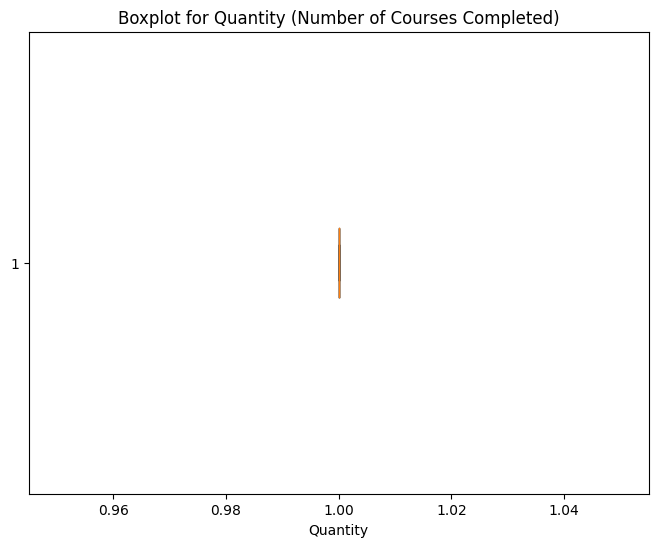

In [7]:
#QUE.7) ARE THERE ANY OUTLIERS IN THE QUANTITY(number of courses completed) ATTRIBUTE?

import matplotlib.pyplot as plt

# Summary statistics for the 'Quantity' column
quantity_stats = df['Quantity'].describe()
print(quantity_stats)

# Calculate IQR
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Quantity'] < lower_bound) | (df['Quantity'] > upper_bound)]
print("Number of outliers in Quantity", outliers.shape[0])
print(outliers[['First Name', 'Quantity']])  # Displaying outliers with First Name

# Visualize with a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Quantity'], vert=False)
plt.title('Boxplot for Quantity (Number of Courses Completed)')
plt.xlabel('Quantity')
plt.show()


The "Quantity" attribute, representing the number of courses completed, does not have any outliers. The statistics show that all values for "Quantity" are 1 (minimum, 25th percentile, median, 75th percentile, and maximum). Therefore, the lower and upper bounds for detecting outliers are both 1, and no data points fall outside this range.

In [8]:
#QUE.8)WHAT IS THE AVERAGE GPA FOR STUDENT FROM EACH CITY?

#Calculate the average CGPA for students from each city
average_cgpa_by_city = df.groupby('City')['CGPA'].mean().sort_values(ascending=False)
print(average_cgpa_by_city)


City
Kolhapur     8.557143
Raipur       8.507143
Sonipat      8.464286
Gurugram     8.459259
Puri         8.450000
               ...   
Panipat      7.615385
Nashik       7.592857
Daman        7.421429
Rewari       7.392308
New Delhi    7.307143
Name: CGPA, Length: 177, dtype: float64


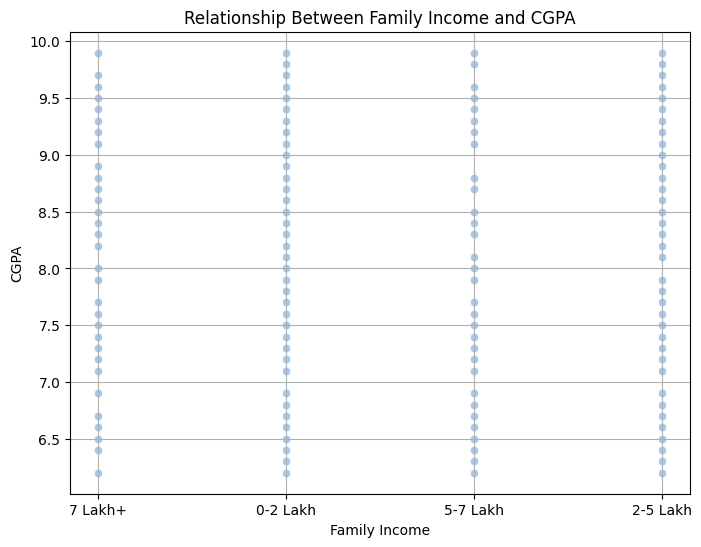

In [20]:
#QUE.9) CAN WE IDENTIFY ANY RELATIONSHIP BETWEEN FAMILY INCOME AND GPA?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_excel('Data analyst Data.xlsx')

family_income_col = 'Family Income'
cgpa_col = 'CGPA'

# Drop rows with missing values
data_clean = data[[family_income_col, cgpa_col]].dropna()

# Scatter plot for visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=data_clean[family_income_col], y=data_clean[cgpa_col])
plt.title('Relationship Between Family Income and CGPA')
plt.xlabel('Family Income')
plt.ylabel('CGPA')
plt.grid(True)
plt.show()



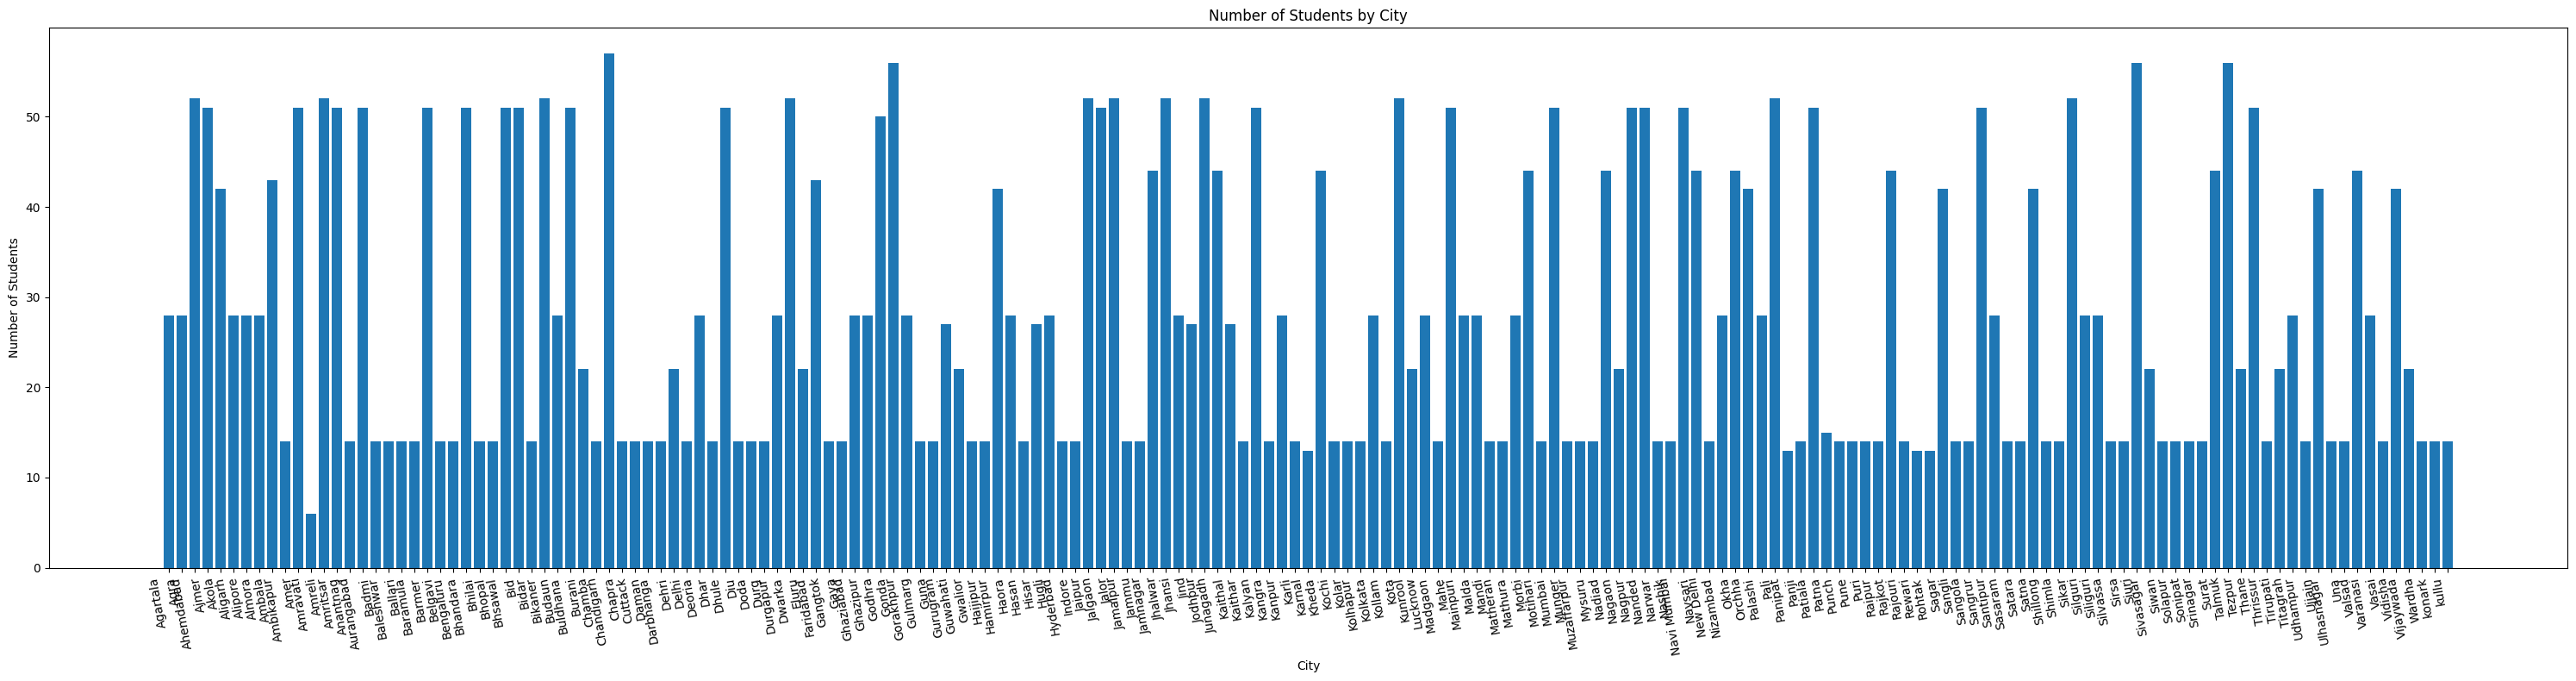

In [10]:
#QUE.10) HOW MANY STUDENTS FROM VARIOUS CITIES?
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel('Data analyst Data.xlsx')

# Count the number of students per city
city_data = df.groupby('City')['First Name'].count().reset_index()

# Create a bar chart
plt.figure(figsize=(30, 8))
plt.bar(city_data['City'], city_data['First Name'])
plt.xlabel('City')
plt.ylabel('Number of Students')
plt.title('Number of Students by City')
plt.xticks(rotation=100, ha='right')  # Rotate x-axis labels for better readability

# Display the chart
plt.tight_layout()
plt.show()


CGPA
6.2    12.000000
6.3    11.384615
6.4    13.156863
6.5    13.569832
6.6    12.464567
6.7    12.689956
6.8    12.592105
6.9    14.250000
7.1    12.915000
7.2    12.793103
7.3    13.263538
7.4    12.764706
7.5    13.024510
7.6    13.271654
7.7    13.921260
7.8    13.970297
7.9    13.051383
8.0    13.080000
8.1    13.702970
8.2    10.607843
8.3    12.615819
8.4    13.039474
8.5    13.030702
8.6    14.352941
8.7    12.789474
8.8    12.666667
8.9    12.376623
9.0    15.346154
9.1    16.948413
9.2    16.898876
9.3    17.000000
9.4    17.306667
9.5    16.318627
9.6    16.754902
9.7    15.026667
9.8    16.307692
9.9    16.367188
Name: Expected salary (Lac), dtype: float64
Family Income
0-2 Lakh    13.874475
2-5 Lakh    14.320000
5-7 Lakh    15.687500
7 Lakh+     14.606742
Name: Expected salary (Lac), dtype: float64
Experience with python (Months)
3    13.192460
4    13.392704
5    12.993559
6    14.834688
7    15.054688
8    14.926250
Name: Expected salary (Lac), dtype: float64


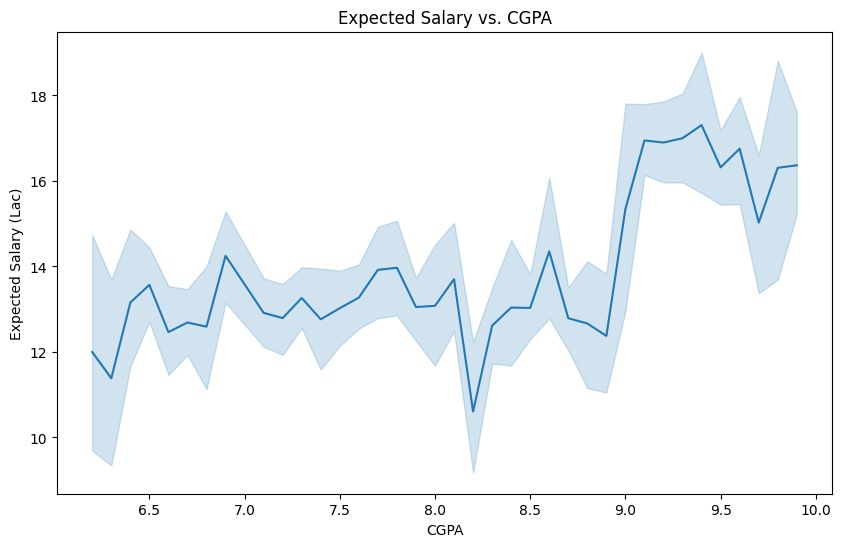

C:\Users\viraj\AppData\Local\Temp\ipykernel_11176\1389917337.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Family Income', y='Expected salary (Lac)', data=df, estimator=sum, ci=None)


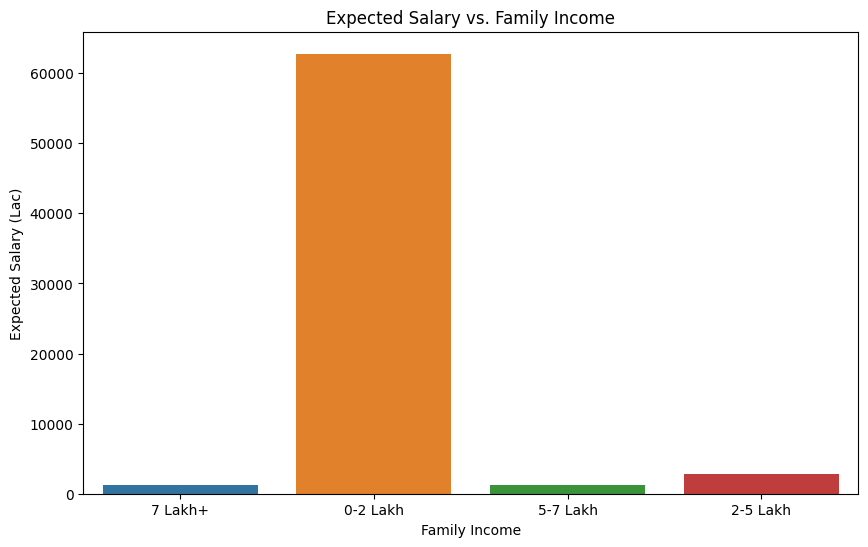

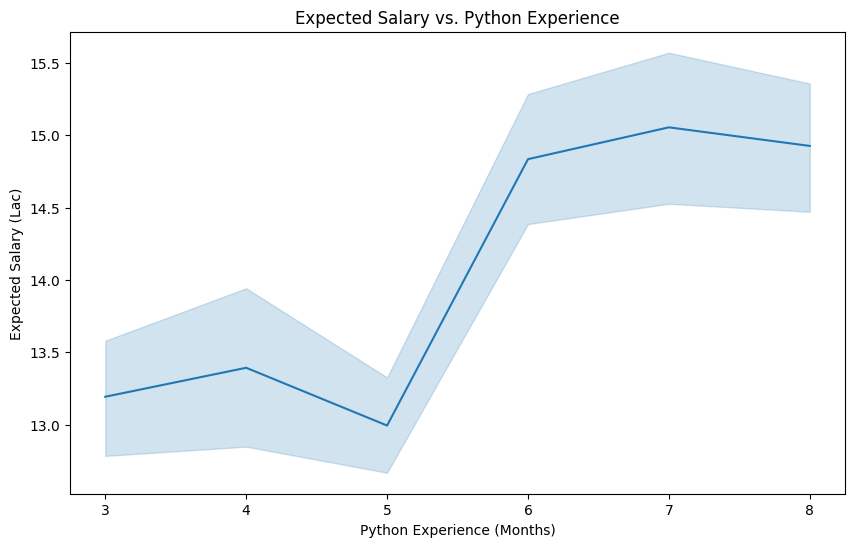

In [11]:
#QUE.11)HOW DOES THE EXCEPETED SALARY VARY BASED ON FACTORS LIKE CGPA,FAMILY INCOME,EXPERIENCE WITH PYTHON?

cgpa_salary = df.groupby('CGPA')['Expected salary (Lac)'].mean().sort_index()
print(cgpa_salary)

family_income_salary = df.groupby('Family Income')['Expected salary (Lac)'].mean().sort_index()
print(family_income_salary)

python_experience_salary = df.groupby('Experience with python (Months)')['Expected salary (Lac)'].mean().sort_index()
print(python_experience_salary)

import matplotlib.pyplot as plt
import seaborn as sns

# CGPA vs. Expected Salary
plt.figure(figsize=(10, 6))
sns.lineplot(x='CGPA', y='Expected salary (Lac)', data=df)
plt.title('Expected Salary vs. CGPA')
plt.xlabel('CGPA')
plt.ylabel('Expected Salary (Lac)')
plt.show()

# Family Income vs. Expected Salary
plt.figure(figsize=(10, 6))
sns.barplot(x='Family Income', y='Expected salary (Lac)', data=df, estimator=sum, ci=None)
plt.title('Expected Salary vs. Family Income')
plt.xlabel('Family Income')
plt.ylabel('Expected Salary (Lac)')
plt.show()

# Python Experience vs. Expected Salary
plt.figure(figsize=(10, 6))
sns.lineplot(x='Experience with python (Months)', y='Expected salary (Lac)', data=df)
plt.title('Expected Salary vs. Python Experience')
plt.xlabel('Python Experience (Months)')
plt.ylabel('Expected Salary (Lac)')
plt.show()


In [12]:
#QUE.12) WHICH EVENT TEND TO ATTRACT MORE STUDENTS FROM SPECIFIC FIELDS OF STUDY?

# Group by Events and Designation (field of study), and count the number of students
event_field_distribution = df.groupby(['Events', 'Designation']).size().unstack()

# Identify the top fields of study for each event and count the number of students
top_fields_per_event = event_field_distribution.idxmax(axis=1)
top_fields_counts = event_field_distribution.max(axis=1)

# Combine the results and sort by the number of students in descending order
event_top_fields = pd.DataFrame({'Top Field of Study': top_fields_per_event, 'Number of Students': top_fields_counts})
event_top_fields_sorted = event_top_fields.sort_values(by='Number of Students', ascending=False)

print(event_top_fields_sorted)


                                            Top Field of Study  \
Events                                                           
Product Design & Full Stack                           Students   
Internship Program(IP) Success Conclave               Students   
Art of Resume Building                                Students   
Data Visualization using Power BI                     Students   
Talk on Skill and Employability Enhancement           Students   
Skill and Employability Enhancement                   Students   
IS DATA SCIENCE FOR YOU?                              Students   
Hello ML and DL                                       Students   
KYC - Know Your CCPC                                  Students   
The SDLC & their transformations                      Students   
Artificial Intelligence                               Students   
The Agile Ways of Working                             Students   
RPA: A Boon or A Bane                                 Students   
Product Ma

Average CGPA (Leadership): 8.036787247087677
Average CGPA (Non-Leadership): 8.040444274224436
Average Expected Salary (Leadership): 13.971796443899448 Lac
Average Expected Salary (Non-Leadership): 13.795097663730372 Lac


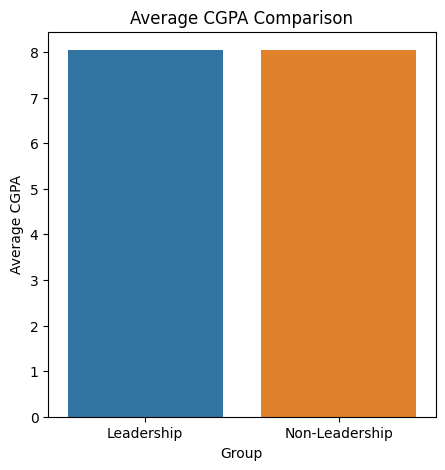

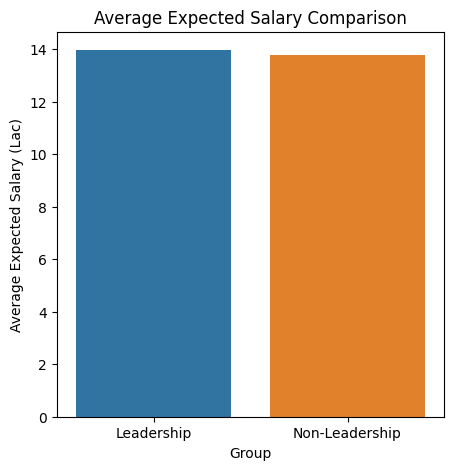

In [13]:
#QUE13.)DO STUDENTS IN LEADERSHIP POSITION DURING THEIR COLLEGE YEARS TEND TO HAVE HIGHER CGPAS OR BETTER EXCEPETED SALARY?

import matplotlib.pyplot as plt
import seaborn as sns

# Separate students based on leadership skills
leadership_students = df[df['Leadership- skills'].str.lower() == 'yes']
non_leadership_students = df[df['Leadership- skills'].str.lower() == 'no']

# Calculate average CGPA for both groups
avg_cgpa_leadership = leadership_students['CGPA'].mean()
avg_cgpa_non_leadership = non_leadership_students['CGPA'].mean()

# Calculate average expected salary for both groups
avg_salary_leadership = leadership_students['Expected salary (Lac)'].mean()
avg_salary_non_leadership = non_leadership_students['Expected salary (Lac)'].mean()

# Display results
print("Average CGPA (Leadership):",avg_cgpa_leadership)
print("Average CGPA (Non-Leadership):", avg_cgpa_non_leadership)

print("Average Expected Salary (Leadership):", avg_salary_leadership, "Lac")
print("Average Expected Salary (Non-Leadership):", avg_salary_non_leadership, "Lac")

# Visualization for CGPA comparison
plt.figure(figsize=(5, 5))
sns.barplot(x=['Leadership', 'Non-Leadership'], y=[avg_cgpa_leadership, avg_cgpa_non_leadership])
plt.title('Average CGPA Comparison')
plt.ylabel('Average CGPA')
plt.xlabel('Group')
plt.show()

# Visualization for Expected Salary comparison
plt.figure(figsize=(5, 5))
sns.barplot(x=['Leadership', 'Non-Leadership'], y=[avg_salary_leadership, avg_salary_non_leadership])
plt.title('Average Expected Salary Comparison')
plt.ylabel('Average Expected Salary (Lac)')
plt.xlabel('Group')
plt.show()


In [14]:
#QUE.14) HOW MANY STUDENTS ARE GRADUATING BY THE END OF 2024?

# Filter students graduating by the end of 2024
graduating_2024_or_earlier = df[df['Year of Graduation'] <= 2024]

# Count the number of students
num_students_graduating_2024 = graduating_2024_or_earlier.shape[0]

print("Number of students graduating by the end of 2024:",num_students_graduating_2024)


Number of students graduating by the end of 2024: 3047


The most effective promotion channel is Whatsapp with 1067 student participations.


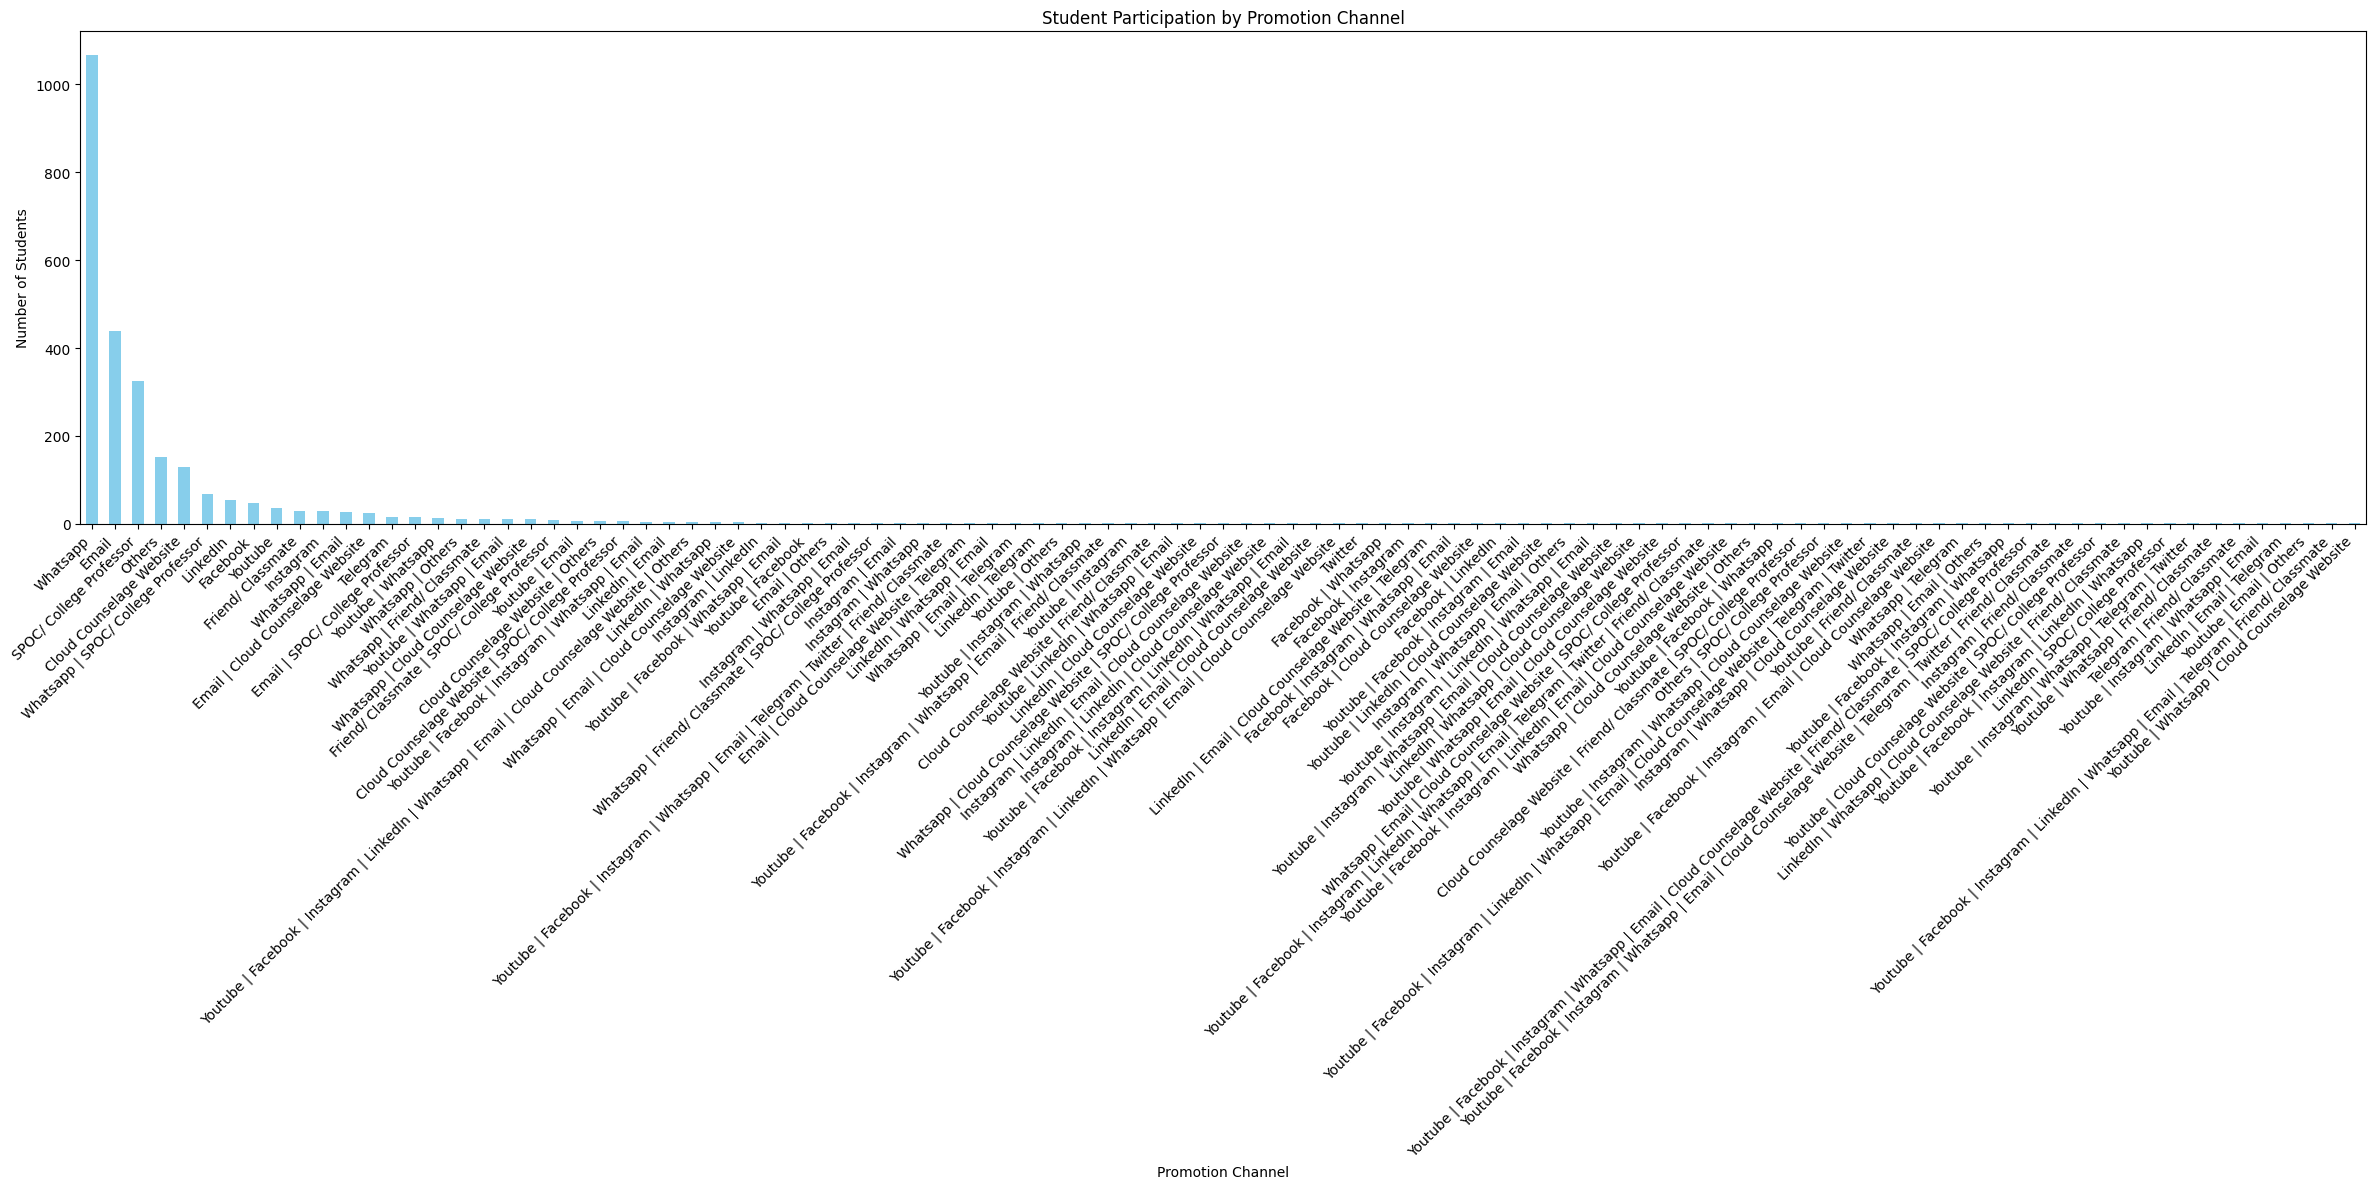

In [15]:
#QUE.15)WHICH PROMOTION CHANNEL BRINGS IN MORE STUDENT PARTICIPATIONS FOR THE EVENT?

import matplotlib.pyplot as plt

# Count the occurrences of each promotion channel
promotion_channel_counts = df['How did you come to know about this event?'].value_counts()

# Display the promotion channel that brings in the most student participation
most_effective_channel = promotion_channel_counts.idxmax()
most_effective_channel_count = promotion_channel_counts.max()

print("The most effective promotion channel is", most_effective_channel, "with", most_effective_channel_count, "student participations.")

# Visualization: Bar plot of promotion channels and their student participation
plt.figure(figsize=(24,12))
promotion_channel_counts.plot(kind='bar', color='skyblue')
plt.title('Student Participation by Promotion Channel')
plt.xlabel('Promotion Channel')
plt.ylabel('Number of Students')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [16]:
#QUE.16)FIND THE NUMBER OF STUDENTS WHO ATTENDED THE EVENTS RELATED TO DATA SCIENCE?

# Define a list of relevant keywords
relevant_keywords = ['IS DATA SCIENCE FOR YOU?', 'Data Visualization using Power BI', 'Artificial Intelligence', 'Hello ML and DL']

# Filter the events that contain any of the relevant keywords
related_events = df[df['Events'].str.contains('|'.join(relevant_keywords), case=False, na=False)]

# Count the number of students who attended these events
num_related_students = related_events.shape[0]

print('Number of students who attended related events:',num_related_students)


Number of students who attended related events: 1148


In [18]:
#QUE.17)THOSE WHO HAVE HIGH CGPA & MORE EXPERIENCE IN LANGUAGE THOSE WHO HAD HIGH EXPECTATIONS FOR SALARY? (avg)

import pandas as pd

# Load the Excel file
df = pd.read_excel('Data analyst Data.xlsx')

# Define your criteria for high CGPA and experience
high_cgpa_threshold = 8.0  # Example threshold for high CGPA
high_experience_threshold = 2  # Example threshold for years of experience in programming languages

# Filter students with high CGPA and more experience
filtered_df = df[(df['CGPA'] >= high_cgpa_threshold) & (df['Experience with python (Months)'] >= high_experience_threshold)]

# Calculate the average salary expectation for these students
average_salary_expectation = filtered_df['Expected salary (Lac)'].mean()

print('Average salary expectation for students with high CGPA and more experience:', average_salary_expectation)


Average salary expectation for students with high CGPA and more experience: 14.825396825396826


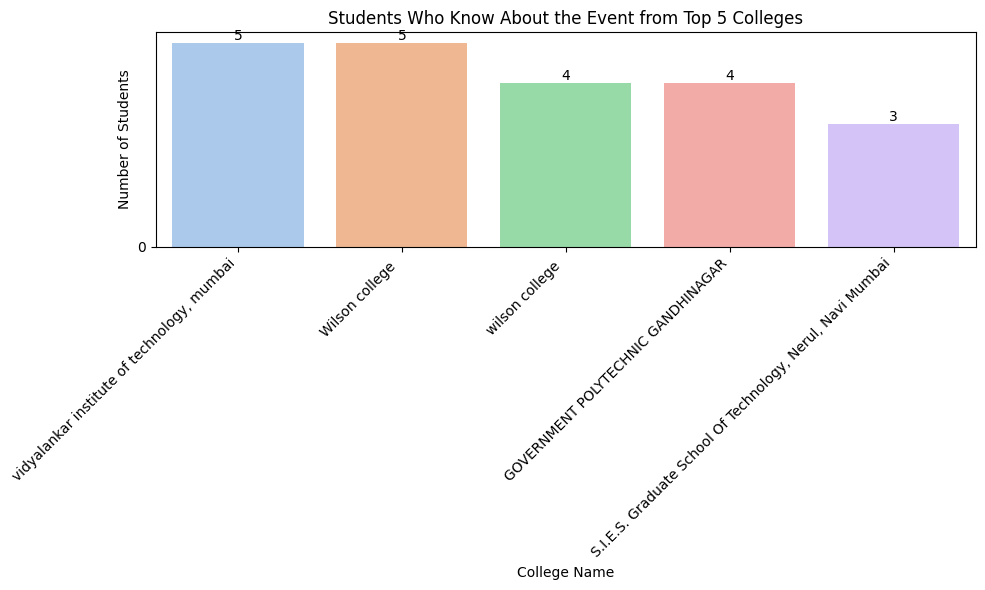

In [19]:
#QUE.18)HOW MANY STUDENTS KNOW ABOUT THE EVENT FROM THEIR COLLEGES? WHICH OF THESE TOP 5 COLLEGES?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

excel_file = "Data analyst Data.xlsx"
excel_sheet = pd.read_excel(excel_file)

college_event_counts = excel_sheet[excel_sheet['Specify in "Others" (how did you come to know about this event)'] == 'College']

college_event_counts = college_event_counts['College Name'].value_counts().reset_index()
college_event_counts.columns = ['College Name', 'Number of Students']

top_5_colleges = college_event_counts.nlargest(5, 'Number of Students')

plt.figure(figsize=(10, 6))
sns.set_palette("pastel")
ax = sns.barplot(y='Number of Students', x='College Name', data=top_5_colleges)

plt.title("Students Who Know About the Event from Top 5 Colleges")
plt.ylabel("Number of Students")
plt.xlabel("College Name")

plt.xticks(range(len(top_5_colleges)), top_5_colleges['College Name'], rotation=45, ha='right')

plt.yticks(range(0, top_5_colleges['Number of Students'].max() + 1, 10))

for index, row in top_5_colleges.iterrows():
    plt.annotate(str(row['Number of Students']), xy=(index, row['Number of Students']),ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()